# Business Case: Yulu - Hypothesis Testing

## Problem Statement

### Objective:

Yulu, a micro-mobility service provider in India, wants to understand the factors influencing the demand for shared electric cycles. The goal is to determine which variables (such as season, weather, working days, etc.) significantly affect the demand and how well they predict the number of cycles rented. This analysis will help Yulu optimize their services, pricing, and resource allocation.

#### Specifically, the company wants to answer the following questions:
1. Does the working day influence the number of electric cycles rented?
2. Is the number of cycles rented similar or different in various seasons?
3. Does weather impact the number of cycles rented?
4. Is weather dependent on the season?

_________________________________________________________________________________________________________________________________________________________

## Load and Inspect the Dataset

### Import all the Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### 1: Load the Dataset

In [8]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


### 2: Check Dataset Structure

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### 3: Statistical Summary

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


### 4: Check for Missing Values

In [19]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### 5: Checking the Data Types and Convert if Necessary

conversion is necessary as follows

#### Column Name:- datetime:
Current Type: object.

Recommendation: Yes, it’s recommended to convert this to datetime for easier date manipulation and analysis.

In [24]:
df['datetime'] = pd.to_datetime(df['datetime'])

#### Column Name:- season:
Current Type: int64 (values: 1, 2, 3, 4)

Recommendation: Yes, convert to category. This column represents a categorical variable with four distinct seasons.

In [27]:
df['season'] = df['season'].astype('category')

#### Column Name:- holiday:
Current Type: int64 (binary: 0 or 1)

Recommendation: Yes, convert to category. This is a binary categorical variable.

In [30]:
df['holiday'] = df['holiday'].astype('category')

#### Column Name:- workingday:

Current Type: int64 (binary: 0 or 1)

Recommendation: Yes, convert to category for the same reason as holiday.

In [33]:
df['workingday'] = df['workingday'].astype('category')

#### Column Name:- weather:
Current Type: int64 (values: 1, 2, 3, 4)

Recommendation: Yes, convert to category. This represents different weather conditions.

In [36]:
df['weather'] = df['weather'].astype('category')

#### Column Name:- temp, atemp, humidity, windspeed, casual, registered, count:
Current Types: float64 for temperature and wind speed, int64 for counts and humidity.

Recommendation: No conversion necessary. These are appropriately set as numerical types for analysis.

#### Let's Check Dataset Structure Again

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


### 6: Inspect Date and Time Features

after converting the datetime column to the pandas datetime format, it is beneficial to extract additional time-based features. This will enhance analysis by allowing to capture patterns based on the time of day, day of the week, and month.

**Extracting Time-Based Features:**
1. **Hour:** Helps analyze rental patterns at different times of the day.
2. **Day:** Useful for daily trends, such as peaks in rental activity.
3. **Month:** Important for understanding seasonal trends over the year.
4. **Day of Week:** Allows analysis of differences between weekdays and weekends.

In [45]:
# Creates a new column named hour that contains the hour extracted from the datetime column (values from 0 to 23).
df['hour'] = df['datetime'].dt.hour

# Creates a new column named day that contains the day of the month extracted from the datetime column (values from 1 to 31).
df['day'] = df['datetime'].dt.day

# Creates a new column named month that contains the month extracted from the datetime column (values from 1 to 12).
df['month'] = df['datetime'].dt.month

# Creates a new column named day_of_week that contains the day of the week extracted from the datetime column (values from 0 to 6, where 0 is Monday and 6 is Sunday).
df['day_of_week'] = df['datetime'].dt.dayofweek

#### Result: 
After executing this code, the DataFrame will have four additional columns:

▪ **hour:** (0-23) representing the hour of the day.

▪ **day:** (1-31) representing the day of the month.

▪ **month:** (1-12) representing the month of the year.

▪ **day_of_week:** (0-6) representing the day of the week (Monday to Sunday).

In [48]:
# Dataset Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  category      
 2   holiday      10886 non-null  category      
 3   workingday   10886 non-null  category      
 4   weather      10886 non-null  category      
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  hour         10886 non-null  int32         
 13  day          10886 non-null  int32         
 14  month        10886 non-null  int32         
 15  day_of_week  10886 non-null  int32         
dtypes: c

In [50]:
# Show all the column names:
column_names = list(df.columns)
print("Column Names : ", column_names)

Column Names :  ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'hour', 'day', 'month', 'day_of_week']


In [52]:
# Head of my new Dataset
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5


### Initial Observations

#### Initial Observations from the Dataset

Based on the dataset inspection results you provided, here are some initial observations:

1. **Dataset Overview**:
   - The dataset contains **10,886 entries** (rows) and **12 initial columns** (and 16 after feature extraction).
   - It represents bike rental counts over time, with a timestamp for each entry.

2. **Data Types**:
   - The `datetime` column was initially of type `object`, but it has been successfully converted to `datetime64[ns]`.
   - Four categorical variables (`season`, `holiday`, `workingday`, `weather`) are appropriately converted to `category` types.
   - The other numerical columns (`temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered`, `count`) have suitable data types (float64 and int64).

3. **Statistical Summary**:
   - The **mean temperature** is approximately **20.23°C**, with a maximum of **41°C**, indicating variability in temperature throughout the dataset.
   - The **average humidity** is around **61.89%**, ranging from **0% to 100%**, which suggests potential extreme weather conditions.
   - The **mean wind speed** is about **12.80 m/s**, with a maximum of **56.99 m/s**, indicating the presence of some high wind events.
   - The **count of rentals** ranges from **1 to 977**, suggesting significant variability in bike rentals across different time points.

4. **Holidays and Working Days**:
   - The `holiday` variable is binary with a mean close to **0.03**, suggesting that holidays are relatively rare in this dataset (around 3% of the observations).
   - The `workingday` variable has a mean of **0.68**, indicating that most of the entries correspond to working days (approximately 68%).

5. **Weather Conditions**:
   - The `weather` variable, with a mean of approximately **1.42**, shows that most entries are under clear conditions (1), with few observations under heavier conditions (3 and 4).

6. **Rental Patterns**:
   - The distribution of rentals (`count`) appears to show significant variation, which may suggest that time of day (captured by the newly extracted `hour` feature) plays a significant role in bike demand.

7. **Additional Features**:
   - New time-based features (`hour`, `day`, `month`, `day_of_week`) have been added, which will help in analyzing rental patterns over time and may assist in predicting rental counts.

8. **Missing Values**:
   - There are **no missing values** in any of the columns, ensuring that the dataset is complete and ready for analysis.

_________________________________________________________________________________________________________________________________________________________

## Exploratory Data Analysis (EDA)

### 1. Univariate Analysis:

#### Distribution of count (Total Rentals)

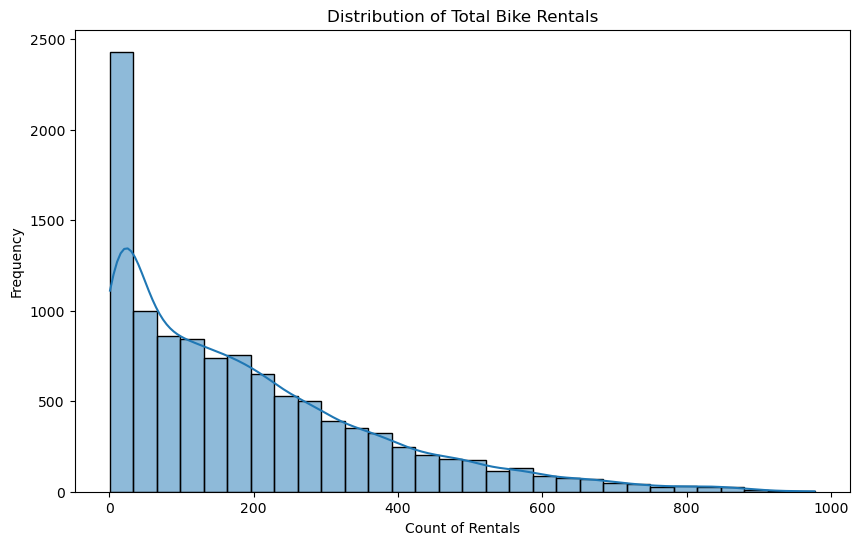

In [59]:
# Visualize how bike rental counts are distributed to check if there are any skewed or normal patterns.
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], bins=30, kde=True)
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Count of Rentals')
plt.ylabel('Frequency')
plt.show()


#### Distribution of temp (Temperature)

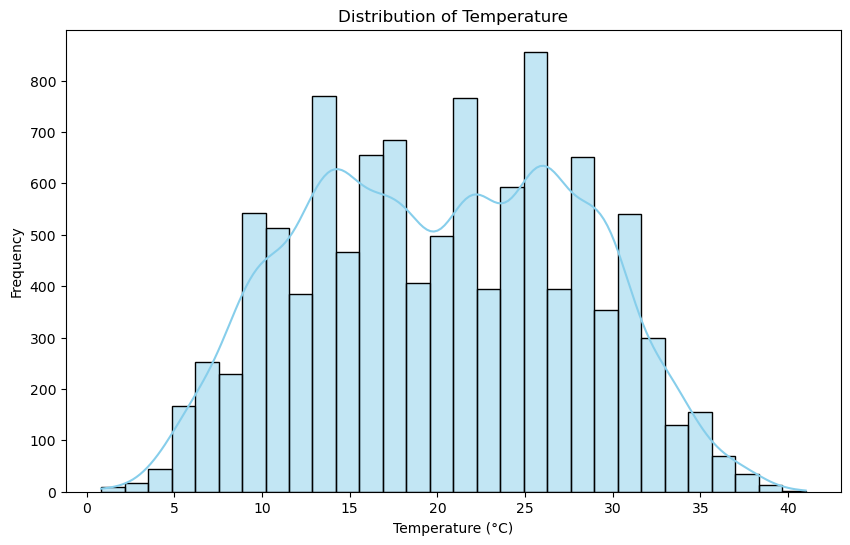

In [66]:
# Since temperature can impact bike rentals, plotting its distribution helps understand the most common temperature ranges in the dataset.
plt.figure(figsize=(10, 6))
sns.histplot(df['temp'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()


#### Distribution of humidity

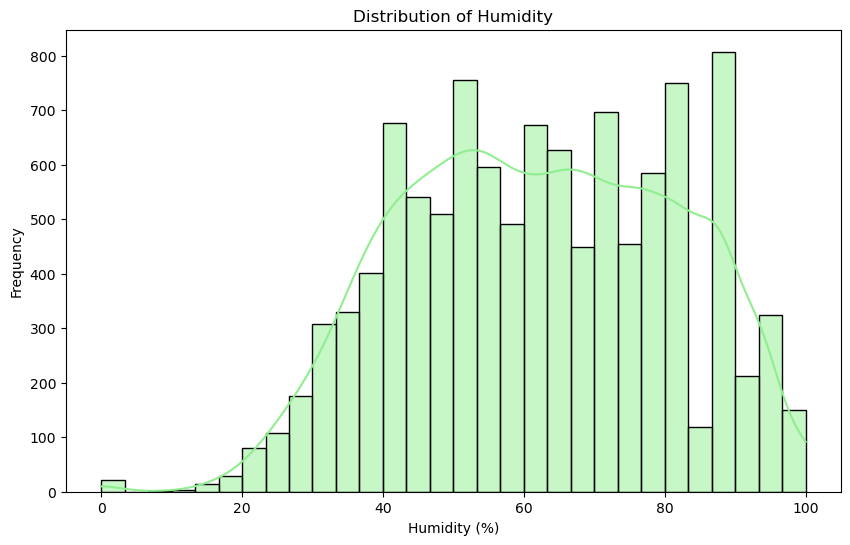

In [69]:
# Humidity may influence rider comfort, so visualizing its distribution is insightful.
plt.figure(figsize=(10, 6))
sns.histplot(df['humidity'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()


#### Distribution of windspeed

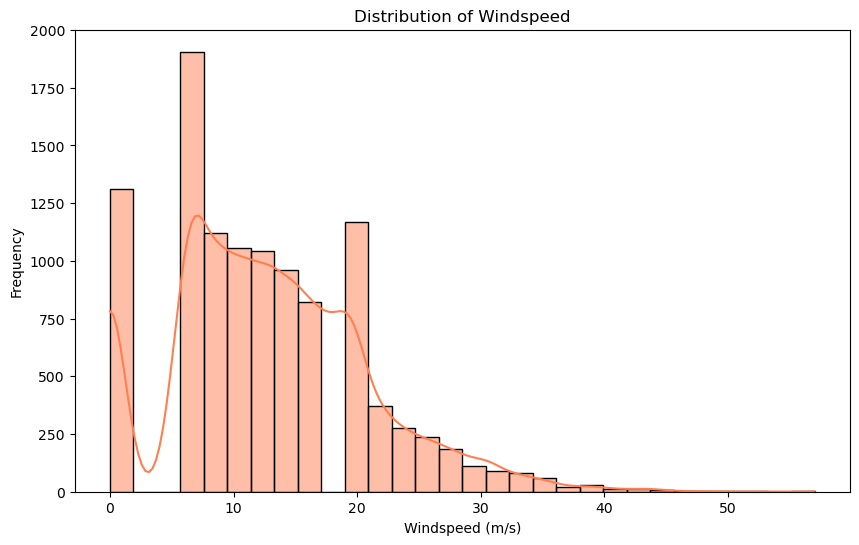

In [72]:
# Windspeed could also impact rideability, making its distribution relevant for understanding biking conditions.
plt.figure(figsize=(10, 6))
sns.histplot(df['windspeed'], bins=30, kde=True, color='coral')
plt.title('Distribution of Windspeed')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Frequency')
plt.show()


In [82]:
# Calculate skewness for count, temp, humidity, and windspeed
skewness = df[['count', 'temp', 'humidity', 'windspeed']].skew()
print("Skewness of Distributions:\n", skewness)


Skewness of Distributions:
 count        1.242066
temp         0.003691
humidity    -0.086335
windspeed    0.588767
dtype: float64


The skewness values provide insight into each variable’s distribution shape:

Count (Skewness = 1.24): This is moderately right-skewed, suggesting that most rental counts are on the lower side, with fewer instances of high counts. A transformation (e.g., log or square root) could help normalize this distribution, especially if you’re planning to use statistical models that assume normality.

Temperature (Skewness = 0.0037): This value is very close to zero, indicating a nearly symmetric distribution. No transformation is needed here, as it is already well-balanced.

Humidity (Skewness = -0.086): Slight negative skew, indicating a near-symmetric distribution with a very subtle left tail. No transformation is required here either.

Windspeed (Skewness = 0.59): Slightly right-skewed, showing a minor concentration of lower windspeed values. This moderate skewness doesn’t necessarily require transformation, but if your model’s performance improves with normalized data, a log or square root transformation might help.

#### Boxplots to Check for Outliers

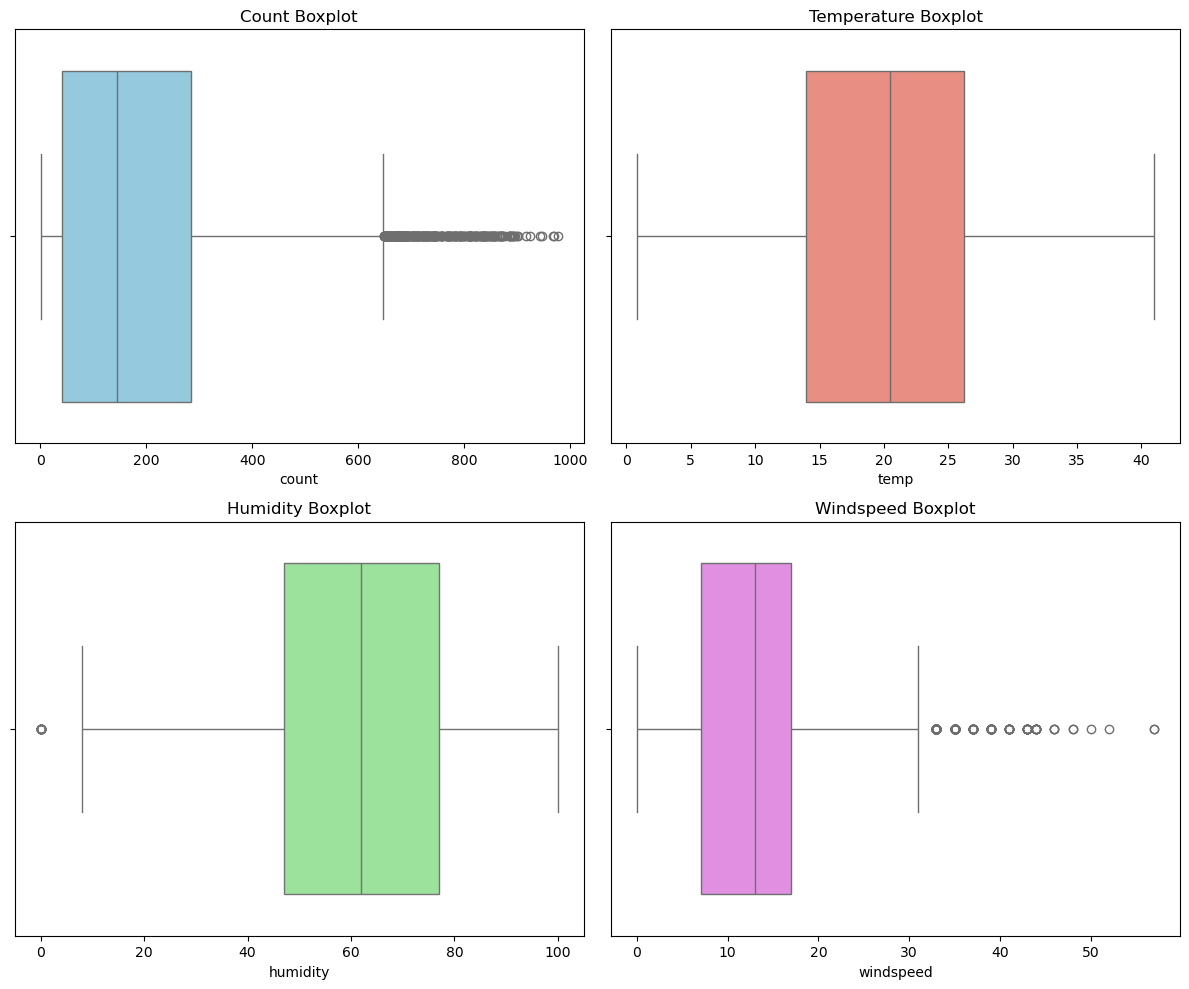

In [90]:
# Boxplots provide a quick way to check for any outliers that may exist in temperature, humidity, and windspeed.
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x=df['count'], ax=axes[0, 0], color='skyblue').set(title='Count Boxplot')
sns.boxplot(x=df['temp'], ax=axes[0, 1], color='salmon').set(title='Temperature Boxplot')
sns.boxplot(x=df['humidity'], ax=axes[1, 0], color='lightgreen').set(title='Humidity Boxplot')
sns.boxplot(x=df['windspeed'], ax=axes[1, 1], color='violet').set(title='Windspeed Boxplot')
plt.tight_layout()
plt.show()

#### Categorical Variables (Bar Charts)

C:\Windows\Temp\ipykernel_4900\2828723375.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=df, palette='coolwarm')


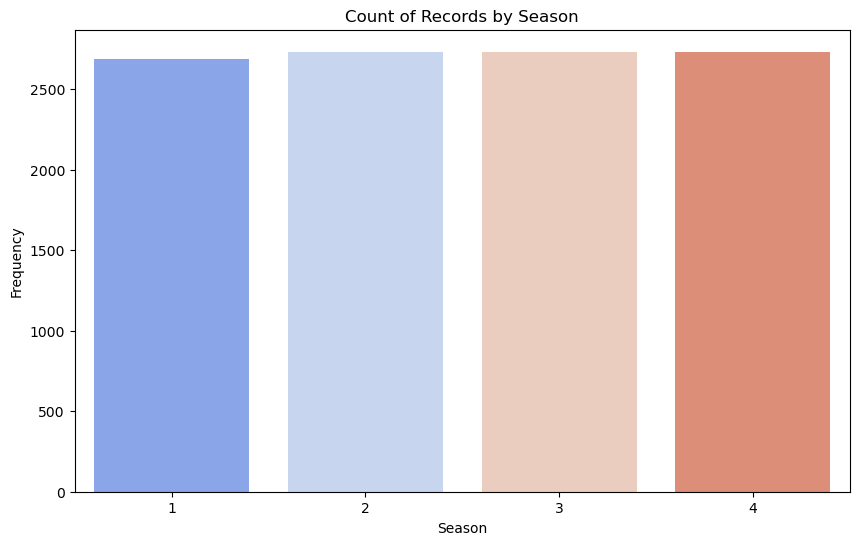

C:\Windows\Temp\ipykernel_4900\2828723375.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='viridis')


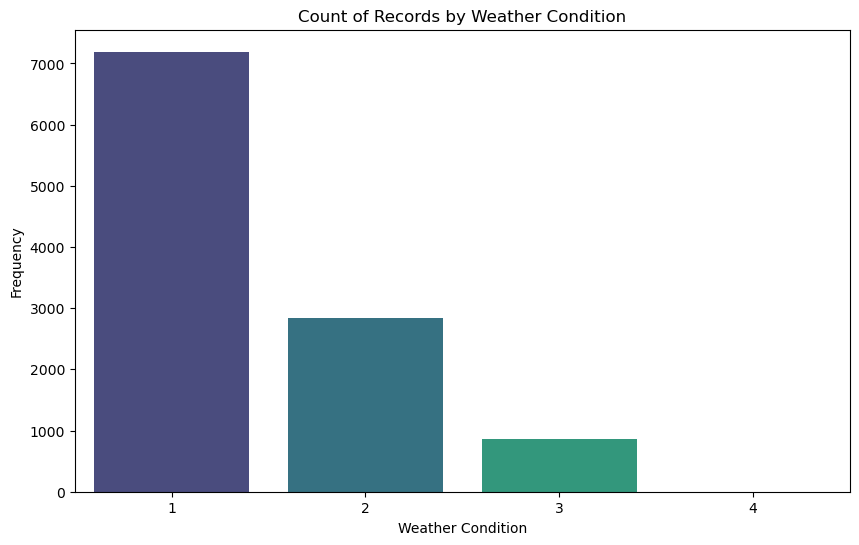

In [80]:
# Bar charts for categorical variables like season, holiday, workingday, and weather can show the distribution of each category and give an idea of how balanced or unbalanced each feature is.
# Bar plot for season
plt.figure(figsize=(10, 6))
sns.countplot(x='season', data=df, palette='coolwarm')
plt.title('Count of Records by Season')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()

# Bar plot for weather
plt.figure(figsize=(10, 6))
sns.countplot(x='weather', data=df, palette='viridis')
plt.title('Count of Records by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.show()


### 2. Bivariate Analysis:

#### Rental Count vs. Temperature

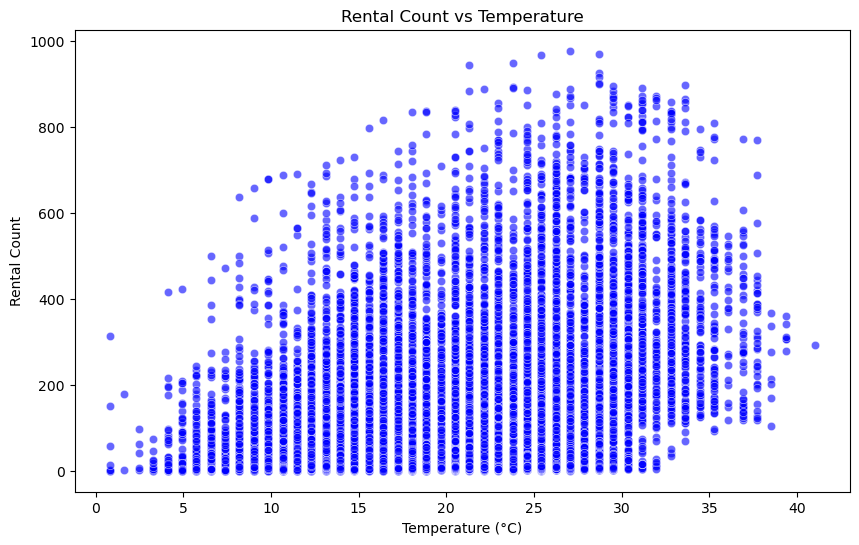

In [95]:
# Temperature is likely a key factor affecting rentals, as more moderate temperatures may encourage riding.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=df, alpha=0.6, color='blue')
plt.title('Rental Count vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rental Count')
plt.show()


In [ ]:
### 3. Time Series Analysis:

In [ ]:
### 4. Categorical Analysis:

In [ ]:
### 5. Missing Value Analysis:

_________________________________________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________________________________________

_________________________________________________________________________________________________________________________________________________________